Задача1: Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга 
    (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
    Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), 
    а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

    Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [45]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = zp
y = ks

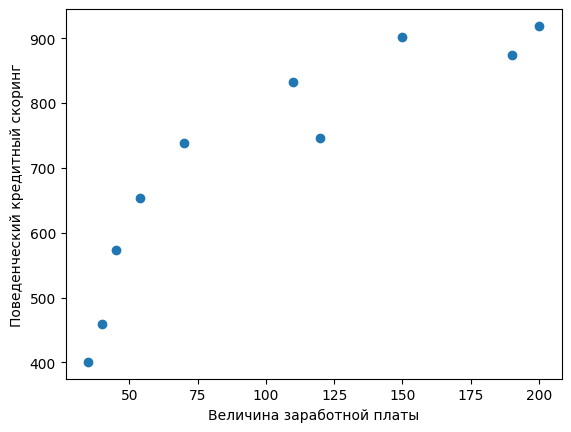

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [47]:
# 1. Проверка наличия линейной зависимости (график + коэфф. корреляции)

plt.scatter(x, y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()
np.corrcoef(x, y)                   # коэффициент корреляции 0,88. Зависимость есть.

In [48]:
# строим модель
x1 = x.reshape(-1, 1)                                # делаем массив х двумерным
# model = LinearRegression()                        # задаем модель линейной регресии
# model.fit(x, y)                                   #  вычисляются оптимальные значение весов b₀ и b₁, используя существующие вход и выход (x и y) в качестве аргументов. 
                                                    # Другими словами, .fit() совмещает модель. Она возвращает self - переменную model. 
                                                    # Поэтому можно заменить две последние операции на: model = LinearRegression().fit(x, y)
model = LinearRegression().fit(x1, y)
print(model.intercept_, x1 * model.coef_[0])         # получаем интерсепт и коэффициент

444.17735732435943 [[ 91.71886088]
 [117.92424971]
 [497.90238766]
 [524.10777648]
 [104.8215553 ]
 [183.43772177]
 [141.50909965]
 [393.08083236]
 [314.46466589]
 [288.25927706]]


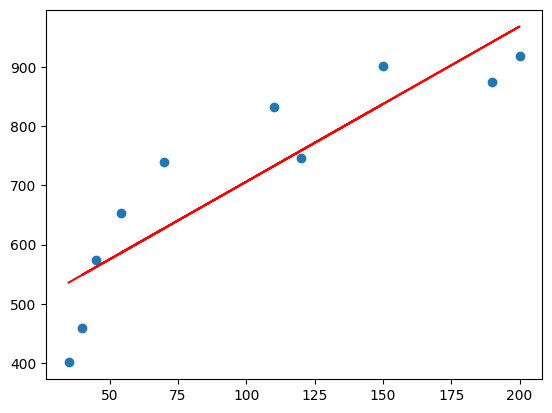

Коэффициент детерминации: 0.7876386635293686


In [49]:
# Строим график по полученным данным
plt.plot(x1, x1 * model.coef_[0] + model.intercept_, color = 'red')

plt.scatter(x1, y)
plt.show()

r_sq = model.score(x1, y)
print('Коэффициент детерминации:', r_sq)


In [50]:
# проверяем коэффициент детерминации
r = np.corrcoef(x, y)[1,0]
r_q = r ** 2
print(r_q)                          # результат одинаковый

0.7876386635293682


In [51]:
# Проверяем условие применимости методов:
# 1) Смотрим отклонение предсказанныых значений относительно фактических. Находим y c крышкой
z = x * model.coef_[0] + model.intercept_         # X умножаем на бэта1 + бэта0
print(z)

[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


In [52]:
e = y - z   # находим остатки
print(e)

[-134.89621821   11.89839297  -68.07974498  -49.2851338   -89.99891262
  111.38492091   67.31354303   64.74181032  -12.64202321   99.56336561]


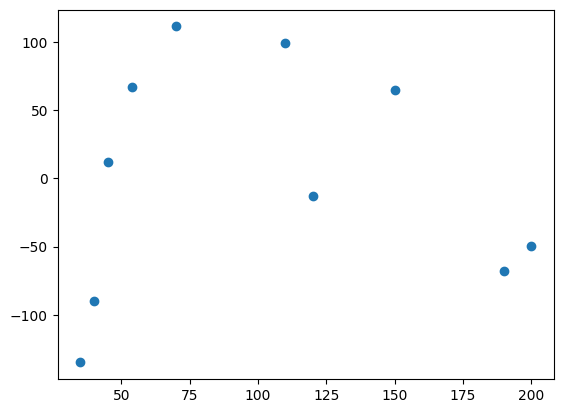

In [53]:
# Проверяем на случайность. Смотрим график
plt.scatter(x, e)
plt.show()                  # остатки случайны

In [54]:
print(stats.shapiro(e))
# pvalue = 0.64 - остатки имеют нормальное распределение

ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)


In [55]:
# Находим значимость модели. Критерий Фишера (имеет только правостороннюю критическую область)
n = len(x)  # кол-во наблюдений
m = 1           # кол-во признаков

k1 = m          # параметры
k2 = n - m - 1

print(k1, k2)
alpha = 0.05                                # уровень значимости
t = stats.f.ppf(1 - alpha, k1, k2)          # находим квантиль для распределения фишера для правосторонней области (1 - alpha)
print(t)                                    # t критическое - 5,317

# Находим наблюдаемое значение:

F = (r_sq / k1) / ((1 - r_sq) / k2)
print(F)

# t критическое 5,317 < t наблюдаемого 29.67 -> принимаем альтернативную гипотезу что коэффициенты значимы.

1 8
5.317655071578712
29.67164085966451


Расчер без интерсепт:

In [56]:
x2 = zp
x2 = x2.reshape(-1, 1)                                # делаем массив х двумерным
model1 = LinearRegression(fit_intercept=False).fit(x2, y)
print(model1.intercept_, x2 * model1.coef_[0])         # получаем коэффициент


0.0 [[ 206.1437147 ]
 [ 265.04191891]
 [1119.06587983]
 [1177.96408403]
 [ 235.59281681]
 [ 412.28742941]
 [ 318.05030269]
 [ 883.47306302]
 [ 706.77845042]
 [ 647.88024621]]


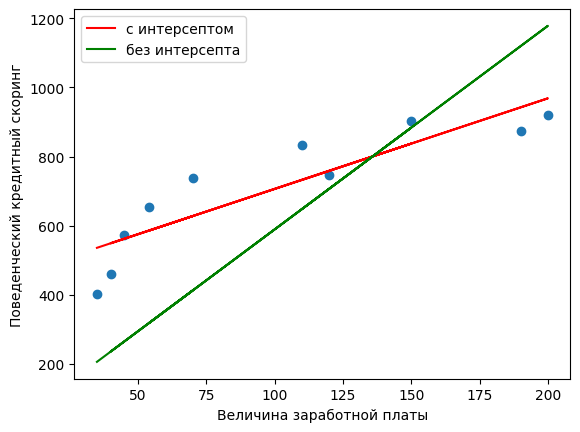

In [57]:
# Строим график по полученным данным
plt.scatter(zp, ks)
plt.plot(x1, x1 * model.coef_[0] + model.intercept_, color = 'red', label='с интерсептом')
plt.plot(x2, x2 * model1.coef_[0], color = 'green', label='без интерсепта')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

ГРАДИЕНТНЫЙ СППУСК

In [92]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x3 = zp
y3 = ks

In [99]:
def mse(b1, x3, y3, n = len(x3)):
    return np.sum((b1 * x3 - y3) ** 2) / n

In [107]:
alpha = 1e-6
b1 = 0.1                # минимальное стартовое значение
i_min = 1
b_min = b1
n = len(x3)
min_mse = mse(b1, x3, y3)
print(min_mse)

for i in range(3000):
    b1 -= alpha * (2 / n) * np.sum((b1 * x3 - y3) * x3)
    if i % 100 == 0:
        print(f"Количество итераций: {i}, B1 = {b1}, mse = {mse(b1, x3, y3)}")
    if mse(b1,x3,y3) > min_mse:
        print(f'Количество итераций: {i}, B1 = {b1}, mse = {min_mse},\nДостигнут минимум.')
        break
    else:
        min_mse = mse(b1,x3,y3)
        i_min = i
        b_min = b1

# Ф-ия вида  y = -0.1669*x

518336.326
Количество итераций: 0, B1 = 0.25952808, mse = 493237.7212546963
Количество итераций: 100, B1 = 5.54537842245223, mse = 58151.31823171113
Количество итераций: 200, B1 = 5.868748638669329, mse = 56522.97550129376
Количество итераций: 300, B1 = 5.888531320728348, mse = 56516.88130936019
Количество итераций: 400, B1 = 5.8897415574471985, mse = 56516.85850140053
Количество итераций: 500, B1 = 5.889815595583751, mse = 56516.858416040064
Количество итераций: 600, B1 = 5.889820124983314, mse = 56516.85841572062
Количество итераций: 629, B1 = 5.889820288866898, mse = 56516.85841571966,
Достигнут минимум.


In [108]:
print(mse(5.889820288866898))

56516.85841571967


ГРАДИЕНТ С ИНТЕРСЕПТОМ

In [114]:
def mse(intersept, b1, x3, y3, n = len(x3)):
    return np.sum(((intersept + b1 * x3) - y3) ** 2) / n

def mse_intersept(intersept, b1, x3, y3): 
    return 2 * np.sum((intersept + b1 * x3) - y3) / len(x)

In [119]:
alpha = 5e-5
b1 =0.1
intersept = 0.1
mse_min = mse(intersept, b1, x3, y3)
i_min = 1
b1_min = b1
intersept_min = intersept
   
for i in range(1000000):
    intersept -= alpha * (2 * np.sum((intersept + b1 * x) - y) / len(x3))
    b1 -= alpha * (2 * np.sum(((intersept + b1 * x3) - y3) * x3) / len(x3))
    if i%50000 == 0:
        print(f"Количество итераций: {i}, intersept = {intersept}, B1 = {b1}, mse = {mse(intersept, b1, x3, y3)}")
    if mse(intersept, b1, x3, y3) > mse_min:
        print(f"Количество итераций: {i_min}, intersept = {intersept_min}, B1 = {b1_min}, mse = {mse(intersept, b1, x3, y3)}, \nДостигнут минимум.")
        break
    else:
        mse_min = mse(intersept, b1, x3, y3)
        i_min = i
        b1_min = b1
        intersept_min = intersept
print(f'intersept = {intersept_min}\nb1={b1_min}')

Количество итераций: 0, intersept = 0.169966, B1 = 8.07468054476, mse = 122318.06397097567
Количество итераций: 50000, intersept = 319.27767648420047, B1 = 3.5398324356503275, mse = 10427.569111705801
Количество итераций: 100000, intersept = 409.0442373734796, B1 = 2.879127619051743, mse = 6783.521961452364
Количество итераций: 150000, intersept = 434.29473705519484, B1 = 2.693277491833349, mse = 6495.188684804794
Количество итераций: 200000, intersept = 441.3974680483413, B1 = 2.6409995775222037, mse = 6472.374468908443
Количество итераций: 250000, intersept = 443.39540029510493, B1 = 2.62629428586797, mse = 6470.569306309746
Количество итераций: 300000, intersept = 443.95740007610897, B1 = 2.622157823932053, mse = 6470.426473787141
Количество итераций: 350000, intersept = 444.1154853937451, B1 = 2.6209942756156086, mse = 6470.415172240385
Количество итераций: 400000, intersept = 444.159953325044, B1 = 2.6206669802831115, mse = 6470.414278011555
Количество итераций: 450000, intersept 